In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [2]:
df  = pd.read_csv("Client_Data1.csv")

In [3]:
df.head()

,Client ID,Average Number of Tickets,Number of Employees,Value of Contract
0,UY281,125.0,1116.0,250000.0
1,VY811,89.0,1113.0,225000.0
2,XZ882,156.0,1086.0,250000.0
3,SF759,130.0,1086.0,225000.0
4,ZO933,77.0,1063.0,250000.0


In [4]:
df.describe()

,Average Number of Tickets,Number of Employees,Value of Contract
count,298.000000,299.000000,297.000000
mean,45.124161,419.715719,140787.878788
std,43.853383,243.852971,71744.470461
min,1.000000,50.000000,25000.000000
25%,10.000000,208.000000,75000.000000
50%,28.000000,427.000000,150000.000000
75%,73.750000,569.000000,200000.000000
max,222.000000,1116.000000,250000.000000


In [5]:
df.isna().sum()

Client ID                    0
Average Number of Tickets    2
Number of Employees          1
Value of Contract            3
dtype: int64

In [6]:
df.shape

(300, 4)

In [7]:
df.dropna(inplace = True)

In [8]:
df.isna().sum()

Client ID                    0
Average Number of Tickets    0
Number of Employees          0
Value of Contract            0
dtype: int64

In [9]:
# defining feature matrix(X) and response vector(y)
X = df.drop(["Client ID","Value of Contract"],axis=1)

y = df["Value of Contract"]

In [10]:

 
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)


In [11]:
from sklearn import datasets, linear_model, metrics

# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [12]:
# regression coefficients
print('Coefficients: ', reg.coef_)
 

Coefficients:  [225.29135821 222.55434922]


In [13]:

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 

Variance score: 0.782288889823597


In [14]:
print('Variance score: {}'.format(reg.score(X_train, y_train)))

Variance score: 0.7560020458133604


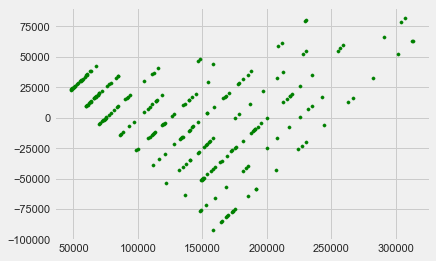

In [15]:
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 

In [16]:
y_pred = reg.predict(X_test)

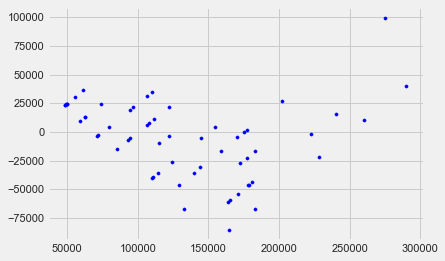

In [17]:
## plotting residual errors in test data
plt.scatter(y_pred, y_pred - y_test,
            color = "blue", s = 10, label = 'Test data');
 

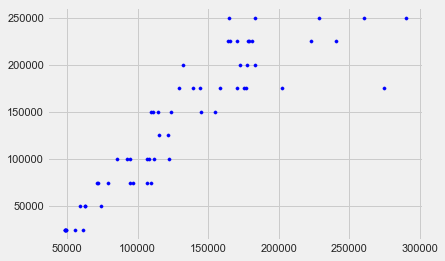

In [18]:
## plotting y_pred, y_test
plt.scatter(y_pred, y_test,
            color = "blue", s = 10, label = 'Test data');

In [19]:
from sklearn.metrics import mean_squared_error
print ('Sk MSE: ' + str(mean_squared_error(y_test,y_pred)) )

Sk MSE: 1145391222.0606434


In [20]:
def RMSE(predict, target):
    return np.sqrt(((predict - target) ** 2).mean())
print ('My RMSE: ' + str(RMSE(y_pred,y_test)) )

My RMSE: 33843.628972978695


In [21]:
def MAPE(predict,target):
    return ( abs((target - predict) / target).mean()) * 100
print ('My MAPE: ' + str(MAPE(y_pred,y_test)) )

My MAPE: 28.15135716264138


In [23]:
df["Value of Contract"].describe()

count       295.000000
mean     140640.677966
std       71780.796133
min       25000.000000
25%       75000.000000
50%      150000.000000
75%      200000.000000
max      250000.000000
Name: Value of Contract, dtype: float64